In [1]:
# # Save data cleaning result to csv

# df_campaign.to_csv('products_per_campaign.csv', index=False)

# **<font color="Blue">Latar Belakang</font>**

Sebuah perusahaan menganalisa latar belakang perilaku customer-nya, customer dapat dibagi menjadi berbagai klasifikasi customer sesuai dengan perilaku berbelanja pada perusahaan tersebut. Lebih lanjut perusahaan dapat menetapkan target produk yang tepat untuk dipasarkan kepada klasifikasi customer tertentu, sehingga akan dapat meningkatkan pemasukan perusahaan.

---------------

# **<font color="Blue">Pernyataan Masalah</font>**

Perusahaan ingin mengetahui klasifikasi customer, klasifikasi ini dapat digunakan sebagai acuan target pemasaran produk yang tepat. Dengan ini pemasaran produk dapat dilakukan secara efisien dan meningkatkan kemungkinan customer untuk membeli. 

### **Rumusan Masalah**:
- **Bagaimana klasifikasi customer berdasarkan perilaku dan latar belakangnya?**
- **Bagaimana perilaku berbelanja customer?**
- **Bagaimana penentuan produk yang sesuai untuk berbagai klasifikasi customer?**
------------

# **<font color="Blue">Data</font>**

Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis). 

In [2]:
import numpy as np
import pandas as pd
import datetime
from pandas.api.types import CategoricalDtype


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px   
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

Berikut dataset 'marketing_campaign.csv' yang disimpan dalam variable **df**

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Penjelasan kolom dari dataset:<br>

**People**

- ID   : Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month
---------



# **<font color="Blue">Data Understanding and Cleaning</font>** 
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset **marketing_campaign**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dari informasi di atas terdapat beberapa yang harus dibersihkan terlebih dahulu, diantaranya:



In [5]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [6]:
# pd.set_option('display.max_colwidth', -1)
# data unique di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


## Data Understanding

- Kolom `Dt_Customer` tipe data berupa *object* akan diubah menjadi *datetime* <br>
- Kolom `Education`, *2n Cycle* dan *Master* merupakan istilah yang sama
- Kolom `Marital_Status` dapat disederhanakan lebih lanjut
    - *Together* dan *Married* merupakan kategori yang serupa, menjadi ***Couple*** <br>
    - *Single*, *Divorced*, *Alone*, dan *Widow* merupakan kategori yang serupa, menjadi ***Single*** <br>
    - *Absurd* dan *YOLO* merupakan kategori yang tidak terdefinisi, menjadi ***Other***
- Kolom `Z_CostContact` dan `Z_Revenue` tiap baris memiliki nilai yang sama, maka kolom tersebut dapat diabaikan
- Kolom `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, dan `MntGoldProds` menjelaskan jumlah pembelian (satuan dollar) pada kategori tertentu. Dapat dijumlahkan sebagai tambahan informasi pengolahan data
- Kolom `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, dan `NumStorePurchases` menjelaskan banyaknya transaksi melalui metode tertentu. Dapat dijumlahkan menjadi berapa banyak transaksi yang dilakukan customer
- Menggabungkan kolom `Kidhome` dan `Teenhome` menjadi kolom baru `Children`
- Missing value pada kolom `Income` sebanyak 24 atau sekitar 1.07%
- Kolom `Year_Birth` perlu diubah menjadi `Age` agar memudahkan pembaca memahami data Customer
- Pada beberapa Customer tidak mencantumkan metode pembelian / purchases, dapat dilihat dari kolom `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, dan `NumStorePurchases`

- ### Ubah kolom *Dt_Customer* menjadi tipe data datetime

Ini dilakukan karena tipe data awal berupa *object*, namun agar bisa dilakukan pengolahan data tanggal harus diubah menjadi *datetime*

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst= True)

- ###  Ubah *2n Cycle* menjadi *Master* pada kolom *Education*

*2n Cycle* dan *Master* merupakan tingkat strata pendidikan yang serupa

In [8]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [9]:
# BEFORE
df.groupby('Education').count()[['ID']]

,ID
Education,
2n Cycle,203
Basic,54
Graduation,1127
Master,370
PhD,486


In [10]:
# Proses ubah value
df["Education"].replace('2n Cycle', 'Master', inplace=True)

# Menampilkan jumlah hasil value yang sudah diubah
df.groupby('Education').count()[['ID']]

,ID
Education,
Basic,54
Graduation,1127
Master,573
PhD,486


- ###  Pengelompokan sederhana kolom `Marital_Status`

*Together* dan *Married* merupakan kategori yang serupa, menjadi ***Couple*** <br>
*Single*, *Divorced*, *Alone*, dan *Widow* merupakan kategori yang serupa, menjadi ***Single*** <br>
*Absurd* dan *YOLO* merupakan kategori yang tidak terdefinisi

In [11]:
# Menampilkan unique value kolom Marital_Status
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
# Menampilkan jumlah customer berdasarkan masing-masing kategori Marital_Status
df.groupby('Marital_Status').count()[['ID']]

,ID
Marital_Status,
Absurd,2
Alone,3
Divorced,232
Married,864
Single,480
Together,580
Widow,77
YOLO,2


In [13]:
# Proses ubah value menjadi 'Couple'
df["Marital_Status"].replace(['Together', 'Married'], 'Couple', inplace=True)

# Proses ubah value menjadi 'Single'
df["Marital_Status"].replace(['Divorced', 'Alone', 'Widow'], 'Single', inplace=True)

# 'Absurd' dan 'YOLO' -->> Kriteria ini tidak terdefinisi dan jumlahnya sangat sedikit (0.17%), maka data akan dihapus
df.drop(df[(df['Marital_Status'] == 'Absurd') | (df['Marital_Status'] == 'YOLO')].index, inplace=True)

# Menampilkan jumlah hasil value yang sudah diubah
df.groupby('Marital_Status').count()[['ID']]


,ID
Marital_Status,
Couple,1444
Single,792


- ### Mengubah kolom `Year_Birth` menjadi `Age`

Proses ini dilakukan agar memudahkan pembaca memahami data Customer berdasarkan umurnya, bukan tahun kelahirannya.<br>
Tahun yang diambil sebagai acuan adalah pada data terakhir diambil / (`Dt_Customer` ditambah dengan `2 tahun`) <br>
    -   (2 tahun diperoleh dari keterangan kolom pembelian `MntWines` dan lainnya yang menyatakan pembelian 2 tahun terakhir)

In [14]:
# Tanggal Customer terakhir yang mendaftar
last_enrollment = df['Dt_Customer'].describe().loc['last']
last_enrollment

Timestamp('2014-06-29 00:00:00')

In [15]:
# Penambahan waktu 2 tahun dari last_enrollment
now = (last_enrollment + pd.DateOffset(years=2)).year
now

2016

In [16]:
# Perhitungan umur setiap Customer 
df['Year_Birth'] = now - df['Year_Birth']

# df['Year_Birth] menjadi df['Age']
df.rename(columns={'Year_Birth' : 'Age'}, inplace=True)

- ###  Drop `Z_CostContact` dan `Z_Revenue`

Kolom *Z_CostContact* dan *Z_Revenue* memiliki nilai yang sama tiap Customernnya, yang berarti kedua kolom ini bersifat independent (tidak mempengaruhi / dipengaruhi) oleh kolom lain. Sehingga kedua kolom ini dapat diabaikan/dihapus karena tidak mempengaruhi analisis data

In [17]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis = 1, inplace=True)

- ### Menjumlahkan pembelian dari setiap kategori

Kolom `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`

In [18]:
list_mnt = []
for column in df.columns:
    if 'Mnt' in column:
        list_mnt.append(column)

df.insert(15, 'Amount_Spending', df[list_mnt].sum(axis=1))

- ### Menjumlahkan banyaknya anak dalam keluarga Customer

Menggabungkan kolom `Kidhome` dan `Teenhome` menjadi kolom baru `Children`


Cek hubungan/korelasi `Kidhome` dan `Teenhome` terhadap kategori produk pembelian 

In [19]:
df[['Kidhome','Teenhome','MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].corr(method='spearman').iloc[:2,2:]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,-0.580056,-0.450111,-0.550600,-0.452916,-0.439982,-0.425548
Teenhome,0.111829,-0.199823,-0.126754,-0.228083,-0.197884,-0.021883


Dari perhitungan korelasi di atas maka dapat dilihat tidak ada yang memiliki hubungan kuat antara jumlah `Kidhome` atau `Teenhome` terhadap tiap kategori produk pembelian,

Sehingga kolom `Kidhome` dan `Teenhome` dapat digabung menjadi kolom `Children`

In [20]:
# Menjumlahkan Kidhome dan Teenhome
Children = df['Kidhome'] + df['Teenhome']

# Insert Children ke dataframe
df.insert(5, 'Children', Children)

# Drop kolom Kidhome dan Teenhome
df.drop(columns=['Kidhome','Teenhome'], inplace=True)


- ### Menjumlahkan banyaknya transaksi

Kolom `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`

In [21]:
list_purchases = []
for column in df.columns:
    if 'Purchases' in column:
        list_purchases.append(column)

df.insert(20, 'Amount_Transactions', df[list_purchases].sum(axis=1))

- ### Missing Value


#### Missing value kolom `Income`
Missing value terdapat pada kolom `Income` sebanyak 24 data atau 1.07%. Karena missing value tergolong sedikit yaitu sekitar 1% maka yang berisi missing value tersebut dapat diabaikan atau dihapus.


In [22]:
df[df['Income'].isna()]

,ID,Age,Education,Marital_Status,Income,Children,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,Amount_Transactions,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,33,Graduation,Couple,NaN,1,2013-11-15,11,5,5,...,2,7,4,0,0,0,0,0,0,0
27,5255,30,Graduation,Single,NaN,1,2013-02-20,19,5,1,...,0,1,27,0,0,0,0,0,0,0
43,7281,57,PhD,Single,NaN,0,2013-11-05,80,81,11,...,4,2,9,0,0,0,0,0,0,0
48,7244,65,Graduation,Single,NaN,3,2014-01-01,96,48,5,...,4,6,10,0,0,0,0,0,0,0
58,8557,34,Graduation,Single,NaN,1,2013-06-17,57,11,3,...,3,6,7,0,0,0,0,0,0,0
71,10629,43,Master,Couple,NaN,1,2012-09-14,25,25,3,...,3,8,9,0,0,0,0,0,0,0
90,8996,59,PhD,Couple,NaN,3,2012-11-19,4,230,42,...,8,9,29,0,0,0,0,0,0,0
91,9235,59,Graduation,Single,NaN,2,2014-05-27,45,7,0,...,2,7,4,0,0,0,0,0,0,0
92,5798,43,Master,Couple,NaN,0,2013-11-23,87,445,37,...,8,1,15,0,0,0,0,0,0,0
128,8268,55,PhD,Couple,NaN,1,2013-07-11,23,352,0,...,7,6,17,0,0,0,0,0,0,0


In [23]:
# Drop missing value data
df.dropna(subset= ['Income'], inplace=True)

#### Missing value kolom `Amount_Transactions`
Customer ini tidak terdeksi menggunakan metode *isna().sum()* karena tidak disebutkan **NaN**, tetapi melihat dari data tersebut bahwa kolom `Amount_Transactions` berisikan 0 yang artinya jumlah dari kolom `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, dan `NumStorePurchases` adalah 0.

In [24]:
df[df['Amount_Transactions'] == 0][['ID','Amount_Spending', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','Amount_Transactions']]

,ID,Amount_Spending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Amount_Transactions
655,5555,6,0,0,0,0,0
981,3955,6,0,0,0,0,0
1524,11110,5,0,0,0,0,0
2132,11181,8,0,0,0,0,0


Dari tabel di atas dijelaskan bahwa `Amount_Spending` `!= 0` (telah melakukan pembelian), namun `Amount_Transactions` `== 0` (tidak mencantumkan metode pembelian)

Solusi:<br>
Data ini akan diisi oleh jumlah metode yang paling banyak (modus metode transaksi)

In [25]:
df[['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

NumDealsPurchases       5135
NumWebPurchases         9032
NumCatalogPurchases     5902
NumStorePurchases      12830
dtype: int64

Dari antara metode transaksi yang paling tinggi yaitu `NumStorePurchases`. Karena `Amount_Spending` dari data ini tergolong sedikit, maka `NumStorePurchases` akan diasumsikan 1

In [26]:
# Mengganti value dengan nilai 1
df.loc[df['Amount_Transactions'] == 0, 'NumStorePurchases'] = 1

In [27]:
# ID Customer yang memiliki Amount_Transactions == 0
id_amount_0 = df[df['Amount_Transactions'] == 0]['ID'].values
id_amount_0

array([ 5555,  3955, 11110, 11181], dtype=int64)

In [28]:
# Menjumlahkan kembali kolom Amount_Transactions
list_purchases = []
for column in df.columns:
    if 'Purchases' in column:
        list_purchases.append(column)

df['Amount_Transactions'] = df[list_purchases].sum(axis=1)


In [29]:
# Cek apakah data NumStorePurchases dan Amount_Transactions sudah sesuai
df[df['ID'].isin(id_amount_0)][['ID','Amount_Spending', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','Amount_Transactions']]

,ID,Amount_Spending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Amount_Transactions
655,5555,6,0,0,0,1,1
981,3955,6,0,0,0,1,1
1524,11110,5,0,0,0,1,1
2132,11181,8,0,0,0,1,1


- ### Outliers

#### Mendeteksi outliers pada kolom `Income`

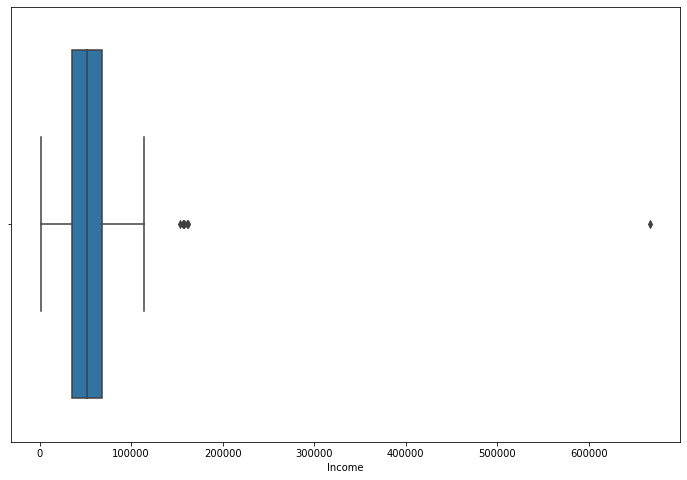

In [30]:
# Menampilkan boxplot untuk melihat outliers
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Income']);

In [31]:
df[['Income']].describe()

,Income
count,2212.000000
mean,52232.510850
std,25187.455359
min,1730.000000
25%,35233.500000
50%,51381.500000
75%,68522.000000
max,666666.000000


In [32]:
# Quartile 1
Q1 = df['Income'].describe()['25%']

# Quartile 3
Q3 = df['Income'].describe()['75%']

# Interquartile
IQR = Q3- Q1

In [33]:
# Menghitung upper bound dari kolom Income
upper_bound = Q3 + 1.5*IQR
upper_bound

118454.75

In [34]:
df[df['Income'] > upper_bound][['ID','Income','Amount_Spending','Amount_Transactions']]

,ID,Income,Amount_Spending,Amount_Transactions
164,8475,157243.0,1608,37
617,1503,162397.0,107,1
655,5555,153924.0,6,1
687,1501,160803.0,1717,44
1300,5336,157733.0,59,2
1653,4931,157146.0,1730,28
2132,11181,156924.0,8,1
2233,9432,666666.0,62,11


#### Observasi data outliers:
- ID : `9432` memiliki Income 666666 dollar ==>> Outlier ini sangat jauh dari data outliers lainnya (4 kali lebih besar), maka data ini disimpulkan untuk dihapus agar pada proses segmentasi Customer tidak terlalu jauh

In [35]:
# Mencari index pada Income maksimal
max_idx = df[df['Income'] == df['Income'].max()].index[0]
max_idx

2233

In [36]:
# Drop Income maksimal
df = df.drop(max_idx)

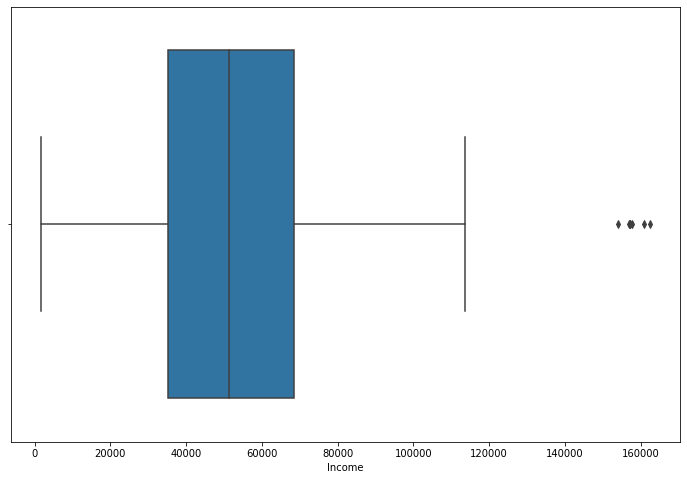

In [37]:
# Boxplot yang baru tanpa nilai maksimum pada outliers

plt.figure(figsize=(12,8))
sns.boxplot(x=df['Income']);

#### Mendeteksi outliers pada kolom `Age`

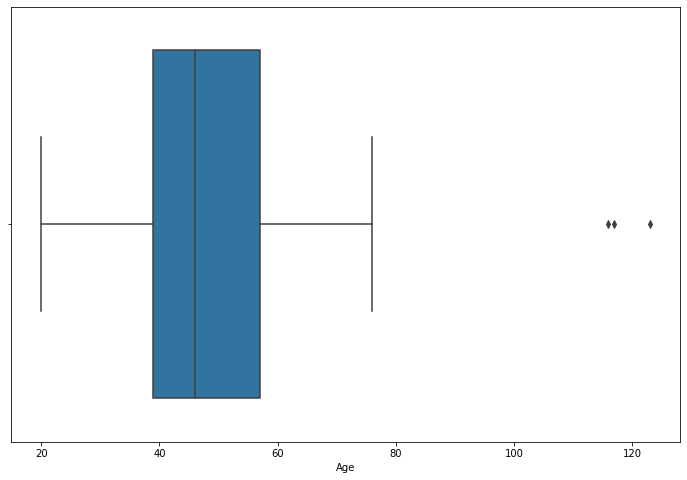

In [38]:
# Menampilkan boxplot untuk melihat outliers
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Age']);

Terdapat 3 outliers `Age` yang diatas 100 tahun, 3 data ini akan di drop karena usianya terlampau jauh dari data lainnya

In [39]:
# Drop data Age yang di atas 100 tahun
df.drop(df[df['Age'] >100].index, inplace=True)

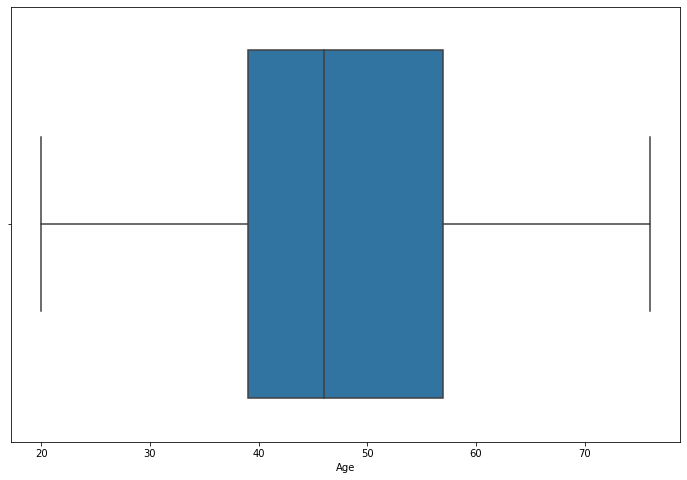

In [40]:
# Menampilkan boxplot tanpa outliers
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Age']);

### Pengelompokkan Age

In [41]:
list_age = []
for i in df['Age']:
    if i <= 40:
        list_age.append('Young Adult')
    elif i >40 and i <=60:
        list_age.append('Old')
    else:
        list_age.append('Senior')

df.insert(2, 'Age_Group', list_age)


### Pengelompokkan Amount_Spending

In [42]:
list_spend_class = []
for i in df['Amount_Spending']:
    if i <= df['Amount_Spending'].quantile(0.33):
        hasil = 'Low'
    elif i > df['Amount_Spending'].quantile(0.63):
        hasil = 'High'
    else:
        hasil = 'Middle'
    list_spend_class.append(hasil)

df.insert(16, 'Spending_Group', list_spend_class)

### Pengelompokkan Dt_Customer (Customer Registered Time)

In [43]:
list_customer_date = []
for i in df['Dt_Customer']:
    if i < df['Dt_Customer'].quantile(0.5):
        hasil = 'Old'
    else:
        hasil = 'New'
    list_customer_date.append(hasil)

df.insert(8, 'Customer_Group', list_customer_date)


### Pengelompokkan Income

In [44]:
# Mengelompokkan Customer berdasarkan Income
list_class = []
for i in df['Income']:
    if i > Q3:
        hasil = 'High'
    elif i < Q1:
        hasil = 'Low'
    else:
        hasil = 'Middle'
    list_class.append(hasil)

# Menambahkan kolom 'Class' ke dalam dataframe
df.insert(6, 'Class', list_class)

----------

In [45]:
# Menampilkan ringkasan akhir Cleaning Data
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2208, 32)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2208,"[10833, 4198]"
1,Age,int64,0,56,"[52, 75]"
2,Age_Group,object,0,3,"[Young Adult, Senior]"
3,Education,object,0,4,"[Graduation, Basic]"
4,Marital_Status,object,0,2,"[Couple, Single]"
5,Income,float64,0,1969,"[61180.0, 51039.0]"
6,Class,object,0,3,"[Middle, Low]"
7,Children,int64,0,4,"[2, 0]"
8,Dt_Customer,datetime64[ns],0,662,"[2013-04-20T00:00:00.000000000, 2014-01-04T00:..."
9,Customer_Group,object,0,2,"[New, Old]"


-------
# **<font color="Blue">Data Analysis</font>** 

### Proses Klasifikasi Member Customer
Proses ini untuk mendapatkan segmentasi Customer, dalam analisa kali ini akan memerlukan faktor berikut ini:<br>
    - `Spending_Group` : Total pengeluaran Customer terhadap produk perusahaan, ini menjadi faktor utama klasifikasi Customer karena menjadi parameter pemasukan secara langsung bagi perusahaan<br>
    - `Customer_Group` : Tanggal Customer melakukan pendaftaran ke perusahaan, ini menjadi faktor klasifikasi Customer karena untuk mengetahui Customer mana yang telah loyal terhadap perusahaan<br>
    - `Class` : Klasifikasi Customer berdasarkan `Income`, ini juga menjadi faktor klasifikasi karena merupakan parameter daya beli Customer terhadap perusahaan<br>

Value dari kolom faktor di atas:
- `Spending_Group` : Low (1), Middle (2), High (3)
- `Customer_Group` : New (1), Old (2)
- `Class` : Low (1), Middle (2), High (3)

Proses pembagian klasifikasi ini dengan mengasumsikan value kolom sebagai ordinal category yang dikonversi menjadi numerical untuk mendapatkan value sebagai pembanding

![](Klasifikasi.PNG)

-------
# **<font color="Blue">Data Visualization</font>** 

In [46]:
list_member = []
for i in range(len(df)):
    # Member Silver
    if (df['Class'].isin(['Low']).iloc[i] == True) & (df['Spending_Group'].isin(['Low']).iloc[i]):
        list_member.append('Silver')
    elif (df['Class'].isin(['Low']).iloc[i] == True) & (df['Customer_Group'].isin(['New']).iloc[i]) & (df['Spending_Group'].isin(['Middle']).iloc[i]):
        list_member.append('Silver')
    elif (df['Class'].isin(['Middle']).iloc[i] == True) & (df['Customer_Group'].isin(['New']).iloc[i]) & (df['Spending_Group'].isin(['Low']).iloc[i]):
        list_member.append('Silver')    
    
    # Member Diamond
    elif (df['Class'].isin(['High']).iloc[i] == True) & (df['Spending_Group'].isin(['High']).iloc[i]):
        list_member.append('Diamond')   
    elif (df['Class'].isin(['High']).iloc[i] == True) & (df['Customer_Group'].isin(['Old']).iloc[i]) & (df['Spending_Group'].isin(['Middle']).iloc[i]):
        list_member.append('Diamond')   
    elif (df['Class'].isin(['Middle']).iloc[i] == True) & (df['Customer_Group'].isin(['Old']).iloc[i]) & (df['Spending_Group'].isin(['High']).iloc[i]):
        list_member.append('Diamond') 

    # Member Gold
    else:
        list_member.append('Gold')


df['Member'] = list_member

In [47]:
# Mengubah tipe data menjadi Category dan mengurutkannya
member_category = CategoricalDtype(categories=["Silver", "Gold", "Diamond"], ordered=True)

In [48]:
# Mengubah tipe data kolom Member menjadi Category
df['Member'] = df['Member'].astype(member_category)

- #### Visualisasi jumlah dari tiap Member

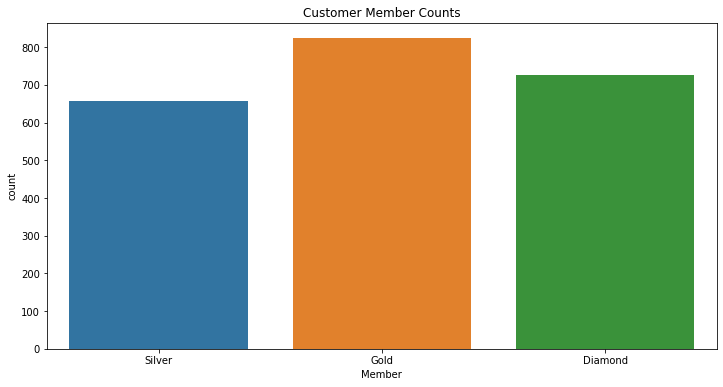

In [49]:
# Visualisasi barplot jumlah dari tiap member
plt.figure(figsize=(12,6))
sns.countplot(
    data = df,
    x = 'Member'
)
plt.title('Customer Member Counts')

plt.show()

In [50]:
df.groupby('Member').count()[['ID']].sort_values('ID')

,ID
Member,
Silver,658
Diamond,726
Gold,824


- #### Jumlah Spending yang dilakukan tiap Member terhadap Perusahaan

In [51]:
df_member_spending = df.groupby('Member').sum()[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds','Amount_Spending']].reset_index()
df_member_spending


,Member,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Amount_Spending
0,Silver,11676,2213,8188,3253,2262,7554,35146
1,Gold,183075,14287,73435,18933,13513,33664,336907
2,Diamond,479190,41566,287122,60674,43985,55454,967991


In [52]:
fig = px.bar(
    data_frame= df_member_spending,
    x = 'Member',
    y = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds'], 
    barmode= 'stack',
    title= 'Spending of Products by Member',
    labels={'value' : 'Total Spending (dollar)', 'variable' : 'Products'},

)
fig.update_yaxes(range=[0,1100000])

fig.update_layout(
    autosize=False,
    width=1400,
    height=600,
    margin=dict(l=50,r=20,b=50,t=50,pad=4)
)


fig.show()

**INSIGHT:**
- Semua member banyak melakukan spending pada produk Wines dan Meat
- Semua member melakukan spending pada produk Fruits paling sedikit dibanding produk lainnya

- #### Perilaku Member dalam Pemilihan Metode Transaksi

In [53]:
df_member_purchase = df.groupby('Member').sum()[['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].reset_index()
df_member_purchase


,Member,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,Silver,1186,1105,199,1878,4276
1,Gold,2479,3751,1650,4732,4773
2,Diamond,1463,4166,4045,6213,2703


In [54]:
fig = px.bar(
    data_frame= df_member_purchase,
    x = 'Member',
    y = ['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'], 
    barmode= 'group',
    title= "Member's Habit affects to Transactions Method",
    labels={'value' : 'Amount Transactions', 'variable' : 'Method Names'},
    text_auto=True
)


fig.update_layout(
    autosize=False,
    width=1400,
    height=600,
    margin=dict(l=50,r=20,b=50,t=50,pad=4)
)


fig.show()

**INSIGHT:**
- Semua member lebih menyukai transaksi secara langsung di Store perusahaan
- Meskipun member Silver banyak melakukan WebVisit, namun jumlah transaksi tidak mengikuti banyaknya WebVisit. Berbeda dengan member Diamond melakukan paling sedikit WebVisit namun transaksi yang terjadi paling banyak. Sementara itu, member Gold melakukan paling banyak WebVisit tetapi melakukan jumlah transaksi tidak paling banyak antara member lainnya. **Ini berarti keberadaan Web tidak mempengaruhi terhadap banyaknya transaksi**

- #### Jumlah transaksi Member berdasarkan latar belakang Customer

In [55]:
# Buat function untuk memisahkan berdasarkan latar belakangnya
def spending_background(data_frame, column_name):
    df_background = data_frame.groupby(column_name).sum()[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']]

    df_background['sum'] = df_background.sum(axis=1)

    for i in range(len(df_background)):
        for j in range(len(df_background.columns)):
            df_background.iloc[i,j] = (((df_background.iloc[i,j]) / (df_background.iloc[i,-1]))*100).round(2)

    df_background.drop(columns='sum', inplace=True)

    plt.figure(figsize=(18,10))
    sns.heatmap(df_background, annot=True, annot_kws={"size":12}, cmap="YlGnBu")
    plt.title(f'Percentage Spending Products per Total Spending Customer based on {column_name}', size=15)
    plt.xticks(size=12)
    plt.yticks(size=12, wrap=True)
    
    return plt.show()

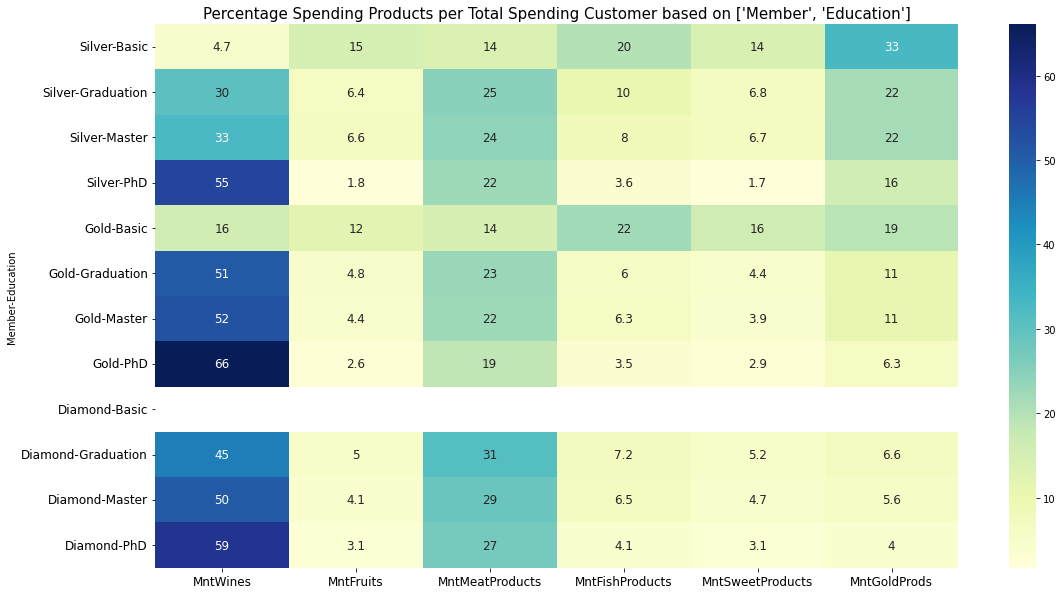

In [56]:
# Berdasarkan Education
member_education = spending_background(df, ['Member','Education'])
member_education

**INSIGHT:**
- Hampir semua member dan edukasi spending pada produk Wine, kecuali member Silver yang memiliki strata Basic melakukan mayoritas spending pada produk Gold

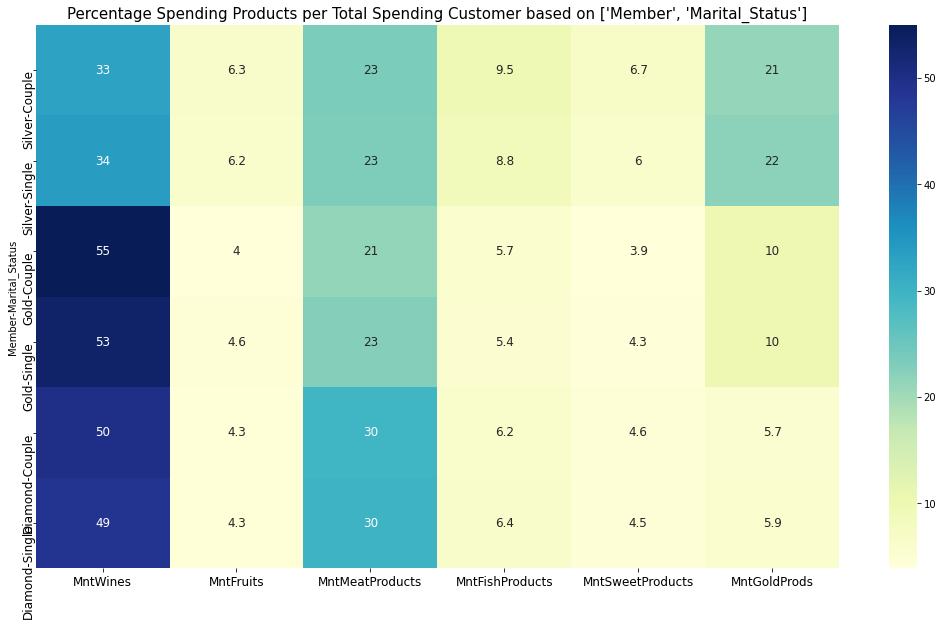

In [57]:
# Berdasarkan Marital_Status
spending_background(df, ['Member','Marital_Status'])

**INSIGHT:**
- Semua member dan Marital_Status melakukan mayoritas spending pada produk Wine dan Meat

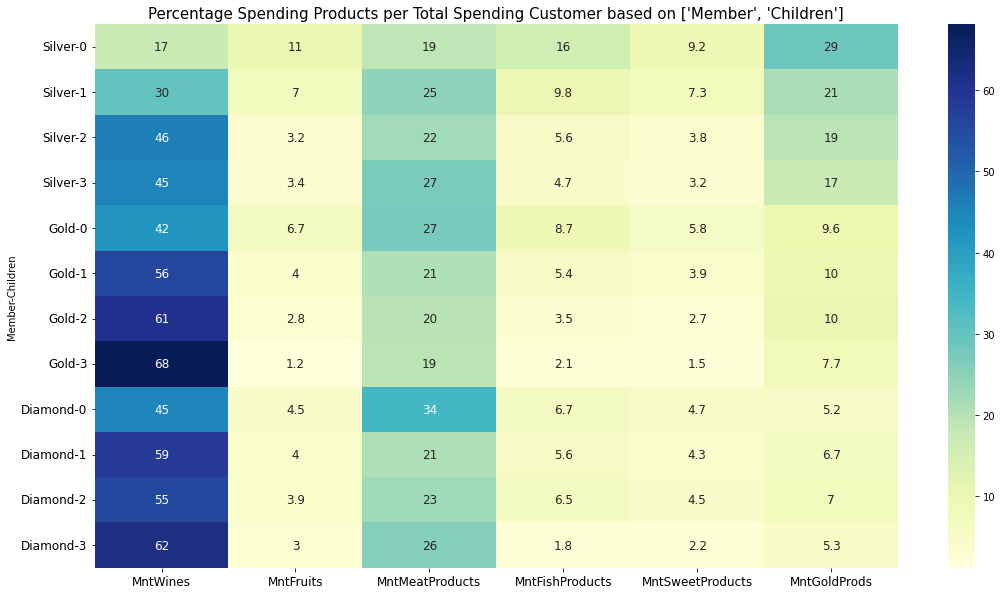

In [58]:
# Berdasarkan Number of Children
spending_background(df, ['Member','Children'])

**INSIGHT:**
- Hampir semua member dan berdasarkan jumlah anak spending pada produk Wine, kecuali member Silver yang tidak memiliki anak melakukan mayoritas spending pada produk Gold

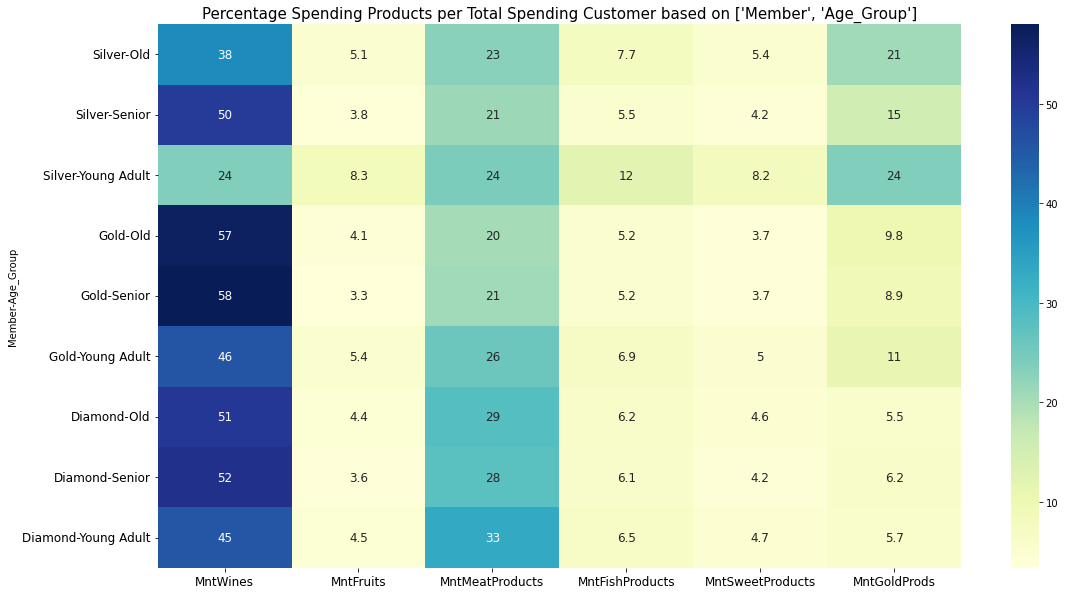

In [59]:
# Berdasarkan Age_Group
spending_background(df, ['Member','Age_Group'])


**INSIGHT:**
- Semua member dan kalangan usia melakukan mayoritas spending pada produk Wine dan Meat

- #### Persentase Campaign yang diterima oleh Customer

In [60]:
Cmp_columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

acceptance_campaign=(df[Cmp_columns].sum() / len(df))*100

df_acc_campaign = pd.DataFrame(acceptance_campaign)

df_acc_campaign.reset_index().rename(columns={'index':'Campaign', 0:'Percentage'})

,Campaign,Percentage
0,AcceptedCmp1,6.385870
1,AcceptedCmp2,1.358696
2,AcceptedCmp3,7.382246
3,AcceptedCmp4,7.427536
4,AcceptedCmp5,7.246377


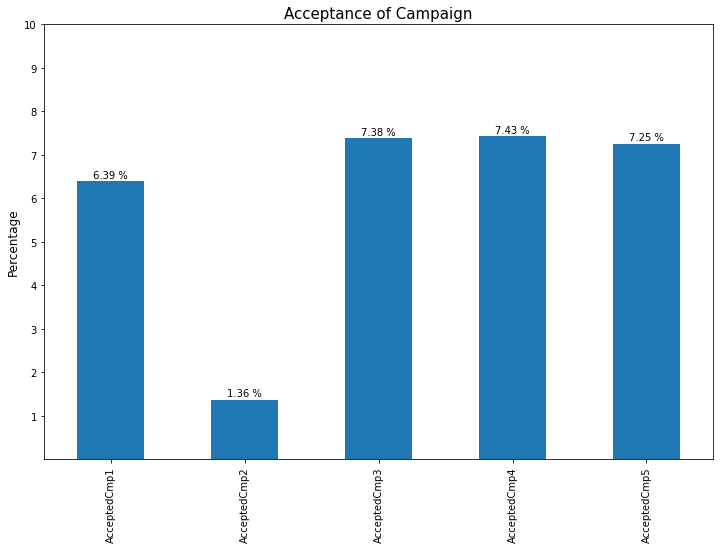

In [61]:
# Bar Plot
plt.figure(figsize=(12,8))

ax = acceptance_campaign.plot(kind='bar')
plt.title('Acceptance of Campaign', size=15)
plt.ylabel('Percentage', size=12)
plt.yticks(ticks=range(1,11,1))

# iterasi tiap bar satu persatu
for bar in ax.patches:

    ax.annotate(
        f'{bar.get_height():.2f} %',                  
        (
            bar.get_x() + (bar.get_width()/2),     
            bar.get_height()  + 0.15                 
        ),
        ha = 'center',                              
        va = 'center'                               
    )

plt.show()

Customer menerima Campaign paling banyak pada Campaign ke 4 sebesar 7.43%<br>
Customer menerima Campaign paling sedikit pada Campaign ke 2 sebesar 1.36%

- #### Jumlah Spending pada produk berdasarkan Campaign

In [62]:
list_campaign = ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

for i in list_campaign:

    if list_campaign.index(i) == 0:

        df_campaign = df[df[i] == 1][['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].\
        transpose().reset_index().rename(columns={'index':'Products'})
        df_campaign['Total'] = df_campaign.sum(axis=1)
        df_campaign = df_campaign[['Products', 'Total']]

    elif list_campaign.index(i) >= 1:

        df_next = df[df[i] == 1][['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].\
        transpose().reset_index().rename(columns={'index':'Products'})
        df_next['Total'] = df_next.sum(axis=1)
        df_next = df_next[['Products', 'Total']]
        
        df_campaign = df_campaign.merge(df_next,on='Products').rename(columns={df_campaign.columns[1]: 'AcceptedCmp1'})


cols=pd.Series(df_campaign.columns)

for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + '.' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]

df_campaign.columns=cols

df_campaign.rename(columns={df_campaign.columns[2]: 'AcceptedCmp2',df_campaign.columns[3]: 'AcceptedCmp3',df_campaign.columns[4]: 'AcceptedCmp4',df_campaign.columns[5]: 'AcceptedCmp5',}, inplace=True)

df_campaign



,Products,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,MntWines,107169,26960,61721,123038,140324
1,MntFruits,7782,689,4628,4470,8909
2,MntMeatProducts,61686,7509,29612,39305,75113
3,MntFishProducts,12904,1162,6128,6684,11979
4,MntSweetProducts,9239,918,4448,5131,10394
5,MntGoldProds,10781,1992,10911,7932,12074


In [63]:
fig = px.bar(
    data_frame= df_campaign,
    x = 'Products',
    y = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'], 
    barmode= 'group',
    title= 'Spending of Products while Campaign Accepted by Customer',
    labels={'value' : 'Total Spending (dollar)', 'variable' : 'Campaign'},
    text_auto=True
)

fig.update_layout(
    autosize=False,
    width=1400,
    height=600,
    margin=dict(l=50,r=20,b=50,t=50,pad=4)
)
fig.show()

**INSIGHT:**<br>
- Pada setiap Campaign / promosi terjadi paling banyak spending pada produk Wines dan Meat
- Pada setiap Campaign / promosi terjadi paling sedikit spending pada produk Fruits
- Paling sedikit spending terjadi pada Campaign 2

----------
-------

## KESIMPULAN DAN SARAN

### KESIMPULAN
Berdasarkan analisis di atas dapat disimpulkan karakteristik Customer sebagai berikut:<br><br>
    - Dari 2208 data Customer terbagi dalam beberapa kategori membership berdasarkan latar belakang dan perilakunya, yaitu:<br>
        * 658 merupakan Silver member<br>
        * 824 merupakan Gold member<br>
        * 726 merupakan Diamond member<br>
    - Semua member memiliki spending habit yang sama yaitu dominan pada produk Wine, tertinggi spending yaitu member Diamond<br>
    - Semua member melakukan spending pada produk Fruits paling sedikit dibanding produk lainnya<br>
    - Semua member lebih menyukai transaksi secara langsung di Store perusahaan<br>
    - Meskipun member Silver banyak melakukan WebVisit, namun jumlah transaksi tidak mengikuti banyaknya WebVisit. Berbeda dengan member Diamond melakukan paling sedikit WebVisit namun transaksi yang terjadi paling banyak. Sementara itu, member Gold melakukan paling banyak WebVisit tetapi melakukan jumlah transaksi tidak paling banyak antara member lainnya. **Ini 
    berarti keberadaan Web tidak mempengaruhi terhadap banyaknya transaksi**<br>

Perilaku spending Customer:<br>
<br>
    - Gold membership yang memiliki strata pendidikan PhD memiliki presentase spending Wine paling tinggi dibanding yang lainnya. <br>
    - Silver membership yang memiliki strata pendidikan Basic dan tidak memiliki anak lebih dominan untuk spending pada produk Gold.<br>
    - Gold membership yang memiliki strata pendidikan Basic hampir merata spending pada semua produk.<br>
    - Silver membership usia Young Adult (\<40 tahun) memilki dominan spending yang sama pada produk Wine, Meat, dan Gold.<br>

Perilaku Customer berdasarkan Campaign / Promosi:<br>
<br>
    - Campaign ke 3,4, dan 5 lebih banyak diterima oleh Customer.<br>
    - Campaign ke 2 paling sedikit diterima oleh Customer.<br>
    - Pada setiap Campaign terjadi paling banyak spending pada produk Wine dan Meat.<br>
    - Pada setiap Campaign terjadi paling sedikit spending pada produk Fruits.<br>
    - Spending paling sedikit terjadi saat Customer menerima Campaign 2.<br>
    - Banyak terjadi spending produk Wine ketika Customer menerima Campaign yang ke 5.<br>

### SARAN
<br>
    - Sebaiknya perusahaan dapat memperbaiki Web untuk memikat daya tarik Customer untuk berbelanja, karena selama ini banyaknya WebVisits tidak mempengaruhi banyaknya transaksi yang terjadi.<br>
    - Pemasaran produk bisa lebih ditingkatkan pada produk Fruits dan Sweet karena penjualannya tergolong rendah daripada produk lainnya, Mungkin bisa diadakannya potongan harga jika telah melakukan <br>
    pembelian pada produk Wine atau Meat. Karena kedua produk ini merupakan yang tertinggi penjualannya.<br>
    - Pemasaran produk Gold bisa lebih difokuskan pada member Silver, karena member Silver presentase kebutuhan produk Gold cukup tinggi dan memiliki potensi untuk ditingkatkan.<br>



